In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### How to detect Outliers?

In [29]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [30]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 1. Discover outliers with visualization tools

##### BoxPlot

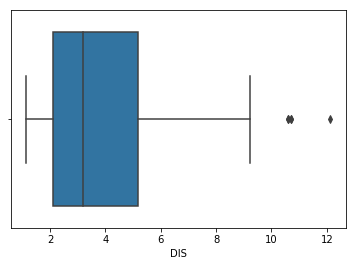

In [5]:
sns.boxplot(x=df['DIS'])

Above plot clearly shows three points between 10 to 12. These are outliers as there are not included in the box of other observation i.e no where near the quartiles.

Here we analysed Uni-variate outlier i.e. we used DIS column only to check the outlier.

#### Scatter plot

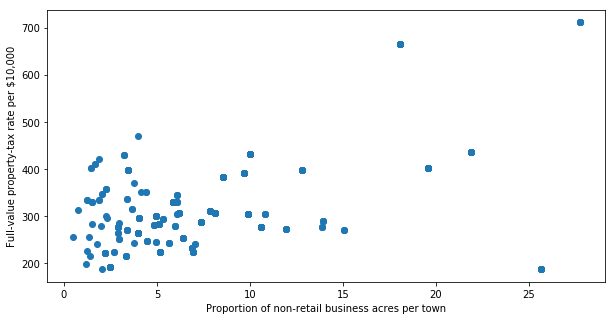

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

Above plot shows that most of data points are lying bottom left side but there are points which are far from the population like top right corner.

### 2. Discover outliers using mathematical function

#### Z-Score
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero.
These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

scipy library provides a ```zscore()``` function to detect the outliers.

In [56]:
from scipy import stats

#Deleting rows with na
df.dropna(inplace=True)

z = np.abs(stats.zscore(df))
z[:5]

array([[0.40081837, 0.27334191, 1.25962   , 0.27123695, 0.1346874 ,
        0.42316079, 0.13401437, 0.13585148, 0.97460889, 0.65694428,
        1.49630294, 0.43074011, 1.06712587, 0.17963958],
       [0.39853454, 0.47905119, 0.56972405, 0.27123695, 0.74547519,
        0.20224511, 0.35784852, 0.55433393, 0.85863308, 0.97818414,
        0.3408793 , 0.43074011, 0.49719648, 0.08319067],
       [0.39853672, 0.47905119, 0.56972405, 0.27123695, 0.74547519,
        1.2982164 , 0.28121421, 0.55433393, 0.85863308, 0.97818414,
        0.3408793 , 0.38509692, 1.19727801, 1.35142445],
       [0.39798399, 0.47905119, 1.2784617 , 0.27123695, 0.84284715,
        1.02996165, 0.83052094, 1.07682866, 0.74265727, 1.09716187,
        0.07507321, 0.4052831 , 1.34661047, 1.20905807],
       [0.39825818, 0.47905119, 1.2784617 , 0.27123695, 0.84284715,
        0.21515576, 0.36737997, 1.07682866, 0.74265727, 1.09716187,
        0.07507321, 0.39956368, 1.03561535, 0.69434883]])

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [57]:
threshold = 3
print(np.where(z > 3))

(array([ 45,  46,  47,  87, 118, 125, 126, 129, 130, 131, 131, 134, 155,
       158, 159, 162, 163, 163, 164, 165, 166, 167, 170, 172, 173, 174,
       175, 178, 178, 183, 199, 200, 200, 208, 210, 213, 214, 216, 220,
       221, 221, 221, 222, 272, 274, 275, 276, 276, 277, 278, 279, 280,
       284, 285, 285, 286, 288, 288, 289, 290, 290, 291, 292, 292, 296,
       310, 315, 316, 318, 318, 319, 320, 322, 322, 322, 323, 324, 326,
       326, 327, 331, 332, 334, 339, 340, 341, 345, 351, 352, 353, 354],
      dtype=int32), array([ 1,  1,  1, 11,  3,  3, 11,  3, 13,  3, 13, 13, 13,  1,  1,  1,  1,
       13,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5, 13,  3,  1,  5, 13, 13,
        3,  3,  3,  3,  3,  1,  3, 13,  1,  1,  7,  7,  1,  7,  7,  3,  3,
        3,  3,  3,  5,  5,  3, 13, 13,  3, 13, 12,  5, 12,  0,  0,  0,  0,
        0, 11, 11, 11,  0, 11, 12, 11, 11,  0, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11], dtype=int32))


The first array contains the list of row numbers and second array respective column numbers, which mean z[45][1] have a Z-score higher than 3.

Let's try to find the actual value of the outlier.

In [49]:
z[45][1]

3.2829142822588087

Hence the data point — 45th record on column ZN (row 45 and column index 1 in df dataframe) is an outlier.

Z-score is a simple, yet powerful method to get rid of outliers in data if you are dealing with parametric distributions in a low dimensional feature space. For nonparametric problems Dbscan and Isolation Forests can be good solutions.

#### IQR Method

In [ ]:
### https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [ ]:
### https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561

In [189]:
### using new dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [190]:
df.dropna(inplace=True)

X = df.iloc[:, :-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [191]:
#Calculating IQR

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Id               74.5
SepalLengthCm     1.3
SepalWidthCm      0.5
PetalLengthCm     3.5
PetalWidthCm      1.5
dtype: float64


In [192]:
X[(X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))].count()

Id               0
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Above output shows that there are 4 outliers in SepalWidthCm feature.
Now we can remove/replace this from the dataframe. Before this, we have to find exact locations of the outliers in out dataframe.

In [193]:
z= X[(X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))]
outliers = np.where(z.notnull())

print(outliers)

(array([15, 32, 33, 60], dtype=int64), array([2, 2, 2, 2], dtype=int64))


Above utput gives us index and column index of outliers (Eg. index =15 and column = 2 for first outlier)

In [194]:
outlier_array = z.stack().reset_index().drop(0,1).apply(tuple, axis=1).tolist()

print(outlier_array)

[(15, 'SepalWidthCm'), (32, 'SepalWidthCm'), (33, 'SepalWidthCm'), (60, 'SepalWidthCm')]


Above code also returns outliers positions in an array format which is easy to process.

In [195]:
for index, feature_name in outlier_array:
    print(f'Dropping row with index {index}')
    
    X.drop(index, inplace=True)

X.head()

Dropping row with index 15
Dropping row with index 32
Dropping row with index 33
Dropping row with index 60


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [196]:
#Verifying that all outliers have been removed.
X[(X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))].sum()

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
dtype: float64

Above output confirms that there are no outliers left in our dataset now.